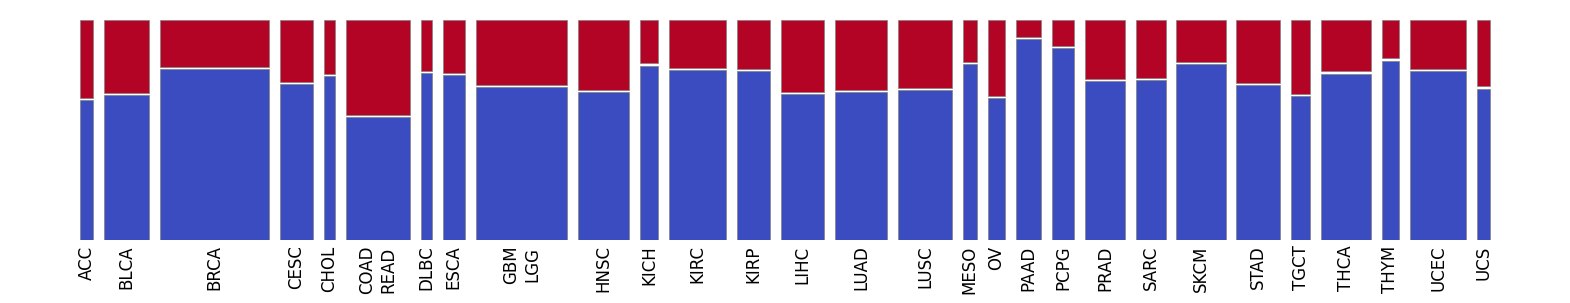

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
ALL_CANCERS = ['LIHC', 'LUSC', 'CESC', 'COADREAD', 'HNSC', 'ESCA', 'KIRC', 'GBMLGG',
       'KIRP', 'LUAD', 'BRCA', 'UCEC', 'SKCM', 'STAD', 'PAAD',
       'BLCA',  'KICH', 'PCPG', 'OV', 'CHOL', 'PRAD', 'TGCT',
       'THCA', 'MESO', 'SARC', 'THYM', 'ACC', 'DLBC', 'UCS']

df = pd.read_csv('/mnt/gpfs01/lsf-workspace/u2070124/Data/Data/pancancer/tcga_features_final_ClusterByCancerNew_withAtypical.csv')
df["type"] = df["type"].replace(["GBM", "LGG"], "GBMLGG")
df["type"] = df["type"].replace(["COAD", "READ"], "COADREAD")
df = df[df["type"].isin(ALL_CANCERS)]

# Group by type and temperature to get the count
type_temp_counts = df.groupby(['type', 'temperature']).size().unstack(fill_value=0)

# Normalize counts to get the distribution
type_temp_distribution = type_temp_counts.div(type_temp_counts.sum(axis=1), axis=0)

# Get the sample sizes for bar widths
type_counts = df['type'].value_counts()

# Define max and min bar width
min_width = 0.1
max_width = 1

# Normalize type counts to the desired range
normalized_widths = (type_counts - type_counts.min()) / (type_counts.max() - type_counts.min())
bar_widths = normalized_widths * (max_width - min_width) + min_width
bar_widths = bar_widths.sort_index()

# Fixed gap size between bars
fixed_gap_size = 0.1
gap_size = 0.01 # gap between hot/cold

# Plotting
fig, ax = plt.subplots(figsize=(20, 3))

# Colormap
colors = plt.get_cmap('coolwarm')

# Dynamic x positions based on bar widths and fixed gaps
x_positions = []
current_position = 0

for iw, width in enumerate(bar_widths):
    if iw==0:
        next_pos = 0
    else:
        next_pos += bar_widths[iw-1]/2 + fixed_gap_size + bar_widths[iw]/2
    x_positions.append(next_pos)
    # current_position += width + fixed_gap_size

xticks=[]
for n, c in enumerate(bar_widths):
    xticks.append(sum(bar_widths[:n]) + bar_widths[n]/2 + fixed_gap_size)

# Plot stacked bars
for i, (type_name, row) in enumerate(type_temp_distribution.iterrows()):
    bottom = 0
    for j, temp in enumerate(row.index):
        height = row[temp] - gap_size / len(row.index)
        ax.bar(
            x_positions[i], height, 
            bottom=bottom, 
            color=colors(j / (len(row.index) - 1)), 
            width=bar_widths[type_name],
            edgecolor='gray',  # Add gray stroke
            linewidth=0.5
        )
        bottom += height + gap_size

# Wrap type names longer than 4 characters
def wrap_label(label, width=4):
    if label=="GBMLGG":
        return "GBM\nLGG"
    return '\n'.join([label[i:i+width] for i in range(0, len(label), width)])

wrapped_labels = [wrap_label(label) for label in type_temp_distribution.index]

# Add type labels below the bars
for i, type_name in enumerate(type_temp_distribution.index):
    wrapped_label = wrap_label(type_name)
    ax.text(x_positions[i], -0.02, wrapped_label, ha='center', va='top', fontsize=12, rotation=90)

# Remove the box, axis, and ticks
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.yaxis.set_ticks([])
ax.xaxis.set_ticks([])
ax.xaxis.set_ticks_position('none')

plt.xlabel('')
plt.ylabel('')
# plt.title('Distribution of Temperatures within Different Types', fontsize=14, pad=20)

plt.savefig("results_final/landscape/hot-cold-distribution.png", dpi=600, bbox_inches = 'tight', pad_inches = 0.01)
plt.savefig("results_final/landscape/hot-cold-distribution.pdf", dpi=600, bbox_inches = 'tight', pad_inches = 0.01)

In [5]:
import pandas as pd 

data = pd.read_csv("gene/data/log2_expr.csv")
data.rename(columns={'Unnamed: 0': 'case_id'}, inplace=True)
data["type"] = data.iloc[:, 0].apply(lambda x: x.split('-')[0])
data["case_id"]= data["case_id"].apply(lambda x: '-'.join(x.split('-')[1:4]))

In [1]:
import pandas as pd
signatures = pd.read_csv("gene/data/signatures.csv")
hugo_table = pd.read_csv("gene/data/data_mrna_seq_v2_rsem_zscores_ref_all_samples.txt", sep="\t")
hugo_table = hugo_table[["Hugo_Symbol", "Entrez_Gene_Id"]]
hugo_table = hugo_table.dropna(axis="rows", how="any")

In [4]:
mosi = pd.read_csv(r"gene\expression_new\BRCA\corr_r.csv")
mosi

,Unnamed: 0,UBE2Q2P2,HMGB1P1,EFCAB8,SRP14P1,HSPB1P1,GTPBP6,EFCAB12,A1BG,A2LD1,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,HSC,0.092766,0.261200,-0.035275,-0.095272,-0.121512,-0.027856,-0.357551,-0.214645,-0.022209,...,0.373431,0.454689,-0.211154,-0.200568,-0.016772,0.198230,-0.012097,-0.050931,-0.159263,0.033820
1,mean(ND),0.099958,0.259649,-0.029951,-0.094350,-0.130406,-0.021167,-0.356408,-0.209427,-0.026760,...,0.364478,0.439604,-0.208246,-0.205772,-0.016810,0.186365,-0.022777,-0.040462,-0.148436,0.037179
2,mean(CL),0.017050,0.219528,0.050163,-0.101119,0.045726,-0.079006,-0.398454,-0.226895,-0.071339,...,0.392461,0.533381,-0.217208,-0.141310,-0.057151,0.192367,-0.023385,-0.030338,-0.163490,-0.062790
3,mean(DC),0.039735,-0.047405,-0.013621,0.045305,-0.034448,0.046026,0.103414,0.087053,0.045402,...,-0.135574,-0.197886,0.066816,-0.000040,0.018408,-0.039818,0.005032,0.069385,0.089521,0.025431
4,max(EC),-0.019021,-0.204308,-0.034482,0.091470,-0.033194,0.066149,0.344088,0.200638,0.048066,...,-0.373365,-0.482534,0.210908,0.148771,0.062353,-0.185407,0.023069,0.035321,0.184058,0.057246
5,mean(HC),0.089051,0.249621,-0.042539,-0.076940,-0.133290,-0.004547,-0.288275,-0.190488,-0.032418,...,0.297769,0.356463,-0.182340,-0.188961,0.002029,0.155924,-0.020551,-0.037938,-0.158464,0.051729


In [9]:
# converting the entrez of all genes data to symbols
sel_genes = hugo_table["Hugo_Symbol"].to_list()
sel_genes_entrez = [str(gene) for gene in hugo_table[hugo_table["Hugo_Symbol"].isin(sel_genes)]["Entrez_Gene_Id"] if str(gene) in data.columns]

sel_data = data[["type", "case_id"]+sel_genes_entrez]
sel_genes_names = [hugo_table[hugo_table["Entrez_Gene_Id"]==int(gene)]["Hugo_Symbol"].iloc[0] for gene in sel_genes_entrez]
columns_rename_dict = dict()
columns_rename_dict = {i: cid for i, cid in zip(sel_genes_entrez, sel_genes_names)}
sel_data.rename(columns=columns_rename_dict, inplace=True)
sel_data.to_csv("gene/data/tcga_all_gene_expressions_normalized.csv", index=None)


C:\Users\u2070124\AppData\Local\Temp\ipykernel_2164\3427898037.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel_data.rename(columns=columns_rename_dict, inplace=True)


In [39]:
# collect list of genes to look up
sel_genes = []
for col in signatures.columns:
    sel_genes.extend(signatures[col].to_list())
sel_genes = list(set(sel_genes))

sel_genes_entrez = [str(gene) for gene in hugo_table[hugo_table["Hugo_Symbol"].isin(sel_genes)]["Entrez_Gene_Id"] if str(gene) in data.columns]

In [10]:
# selecting MNAI genes
sel_genes = [ "AURKA",
"AURKB", "BUB1", "CENPE", "CHEK1", "FOXM1", "MELK", "PBK", "PLK1",
"TTK", "TYMS", "ASPM", "BUB1B", "CCNA2", "CCNB1", "CCNB2", "CDC20",
"CDCA3", "CDCA8", "CENPA", "CENPN", "CEP55", "DEPDC1",
"DLGAP5", "EXO1", "EXOSC9", "HJURP", "KIF14", "KIF18B",
"KIF20A", "KIF23", "KIF2C", "KIF4A", "LMNB2", "MAD2L1", "MCM10",
"MKI67", "NCAPD2", "NCAPG", "NCAPG2", "NCAPH", "NDC80", "PRC1",
"PTTG1", "RFC3", "RRM2", "SMC4", "STIL", "TEX10", "TPX2", "UBE2S"]
# -['DDX39A', 'FAM64A1']
sel_genes_entrez = [str(gene) for gene in hugo_table[hugo_table["Hugo_Symbol"].isin(sel_genes)]["Entrez_Gene_Id"] if str(gene) in data.columns]

sel_data = data[["type", "case_id"]+sel_genes_entrez]
sel_genes_names = [hugo_table[hugo_table["Entrez_Gene_Id"]==int(gene)]["Hugo_Symbol"].iloc[0] for gene in sel_genes_entrez]
columns_rename_dict = dict()
columns_rename_dict = {i: cid for i, cid in zip(sel_genes_entrez, sel_genes_names)}
sel_data.rename(columns=columns_rename_dict, inplace=True)
sel_data["MNAI"] = sel_data[sel_genes].sum(axis=1)
sel_data.to_csv("gene/data/MNAI_gene_data.csv", index=None)

C:\Users\u2070124\AppData\Local\Temp\ipykernel_23204\1712954000.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel_data.rename(columns=columns_rename_dict, inplace=True)
C:\Users\u2070124\AppData\Local\Temp\ipykernel_23204\1712954000.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel_data["MNAI"] = sel_data[sel_genes].sum(axis=1)


In [47]:
# extract selected genes from data
sel_data = data[["type", "case_id"]+sel_genes_entrez]

# rename the entrez cols to gene names
sel_genes_names = [hugo_table[hugo_table["Entrez_Gene_Id"]==int(gene)]["Hugo_Symbol"].iloc[0] for gene in sel_genes_entrez]
columns_rename_dict = dict()
columns_rename_dict = {i: cid for i, cid in zip(sel_genes_entrez, sel_genes_names)}
sel_data.rename(columns=columns_rename_dict, inplace=True)
sel_data.to_csv("gene/data/selected_gene_data.csv", index=None)

/tmp/ipykernel_2196547/2452520472.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel_data.rename(columns=columns_rename_dict, inplace=True)


In [2]:
type_case_df = pd.read_csv('/mnt/gpfs01/lsf-workspace/u2070124/Data/Data/pancancer/tcga_features_clinical_merged.csv')
mitosis = pd.read_xml("/mnt/gpfs01/lsf-workspace/u2070124/Code/mitsa/gene/data/MITOSIS.v2023.2.Hs.xml")

In [3]:
gene_ids = [i for i, cid in enumerate(mitosis["MEMBERS_EZID"][0].split(",")) if cid in data.columns]
ezid = [mitosis["MEMBERS_EZID"][0].split(",")[gene_id] for gene_id in gene_ids]
ezid_names = [mitosis["MEMBERS_SYMBOLIZED"][0].split(",")[gene_id] for gene_id in gene_ids]


In [4]:

data["type"] = data.iloc[:, 0].apply(lambda x: x.split('-')[0])
data["type"].unique()

array(['UCEC', 'STAD', 'ESCA', 'MESO', 'UVM', 'CESC', 'TGCT', 'BRCA',
       'THYM', 'HNSC', 'LUSC', 'THCA', 'LAML', 'COADREAD', 'LIHC', 'SKCM',
       'KIRP', 'DLBC', 'PCPG', 'LGG', 'PAAD', 'GBM', 'KICH', 'UCS',
       'LUAD', 'SARC', 'KIRC', 'CHOL', 'PRAD', 'OV', 'BLCA', 'ACC'],
      dtype=object)

In [5]:
# replace the ezid of the genes with gene symbols
data = data[["type", "case_id"]+ezid]
columns_rename_dict = dict()
# for i, cid in enumerate(ezid):
#     print(i)
#     columns_rename_dict[cid] = ezid_names[i]
columns_rename_dict = {cid: ezid_names[i] for i, cid in enumerate(ezid)}
data.rename(columns=columns_rename_dict, inplace=True)

In [20]:
data["case_id"]= data["case_id"].apply(lambda x: '-'.join(x.split('-')[1:4]))
data.to_csv(save_path+"all_cancers.csv", index=None)

In [18]:
import pandas as pd
save_path = "gene/data/mitosis_genes/"
# Assuming 'data' and 'type_case_df' are your dataframes
for type_name in type_case_df['type'].unique():
    # Use the mask to filter rows from 'data'
    sub_df = data[data["type"] == type_name]

    sub_df["case_id"]= sub_df["case_id"].apply(lambda x: '-'.join(x.split('-')[1:4]))
    sub_df.drop(columns=["type"], inplace=True)
    # Save the sub-dataframe to a csv file
    sub_df.to_csv(save_path + f'{type_name}_mitosis.csv', index=False)


/tmp/ipykernel_2844871/4023293241.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df["case_id"]= sub_df["case_id"].apply(lambda x: '-'.join(x.split('-')[1:4]))
/tmp/ipykernel_2844871/4023293241.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df.drop(columns=["type"], inplace=True)
/tmp/ipykernel_2844871/4023293241.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

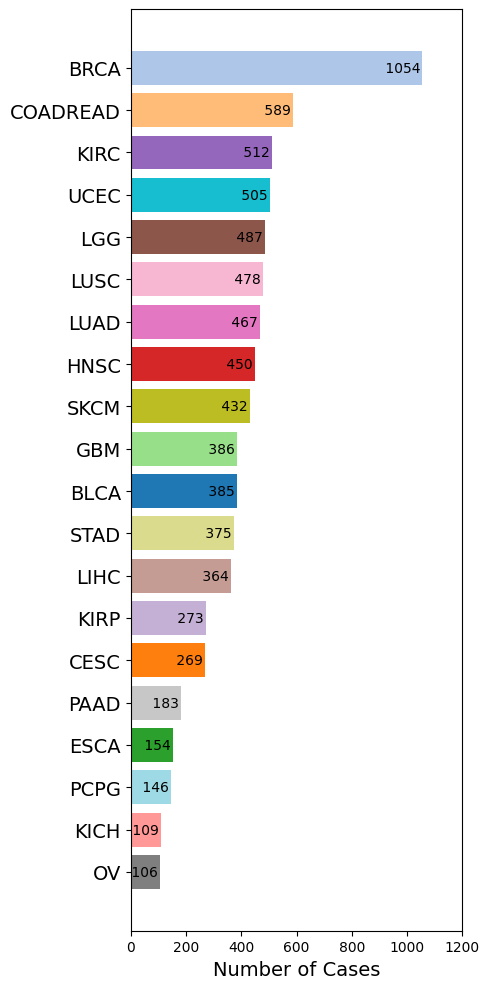

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from utils import get_colors_dict

# Load the CSV file
df = pd.read_csv('/mnt/gpfs01/lsf-workspace/u2070124/Data/Data/pancancer/tcga_features_clinical_merged.csv')
# Check and replace 'COAD' or 'READ' with 'COADREAD'
df['type'] = df['type'].replace(['COAD', 'READ'], 'COADREAD')

# Filter the rows where 'type' is in the specified list
types_to_include = ['BLCA', 'BRCA', 'CESC', 'COADREAD', 'ESCA', 'GBM', 'HNSC', 'KICH', 'KIRC', 'KIRP', 
                    'LGG', 'LIHC', 'LUAD', 'LUSC', 'OV', 'PAAD', 'SKCM', 'STAD', 'UCEC', 'PCPG']
filtered_df = df[df['type'].isin(types_to_include)]

# Count the number of cases for each type
# type_counts = filtered_df['type'].value_counts().sort_index()
type_counts = filtered_df['type'].value_counts().sort_values()

# Create the horizontal bar plot
plt.figure(figsize=(5, 10))
bars  = plt.barh(type_counts.index, type_counts.values, color=[colors_dict.get(t, 'black') for t in type_counts.index])

for bar in bars:
    offset = 120 if bar.get_width()<1000 else 150
    plt.text(bar.get_width()-offset, bar.get_y() + bar.get_height()/2, 
             f' {bar.get_width():.0f}', 
             va='center', color='black')

# plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

plt.xlabel('Number of Cases', fontsize=14)
plt.xlim([0, 1200])
# plt.title('Number of Cases for Each Type')
plt.tight_layout()
plt.show()


In [1]:
# sampling slides for visualizations
import pandas as pd
import json

df = pd.read_csv("/mnt/gpfs01/lsf-workspace/u2070124/Data/Data/pancancer/tcga_features_final.csv")

df["type"] = df["type"].replace(["COAD", "READ"], "COADREAD")
df["type"] = df["type"].replace(["GBM", "LGG"], "GBMLGG")

# Initialize dictionary to store the results
result = {}

# Iterate over each unique type
for t in sorted(df["type"].unique()):
    # Filter the DataFrame for the current type
    type_df = df[df["type"] == t]
    
    # Sample 100 slides or all slides if less than 100
    sampled_slides = type_df["slide"].sample(n=min(100, len(type_df)), random_state=42).tolist()
    
    # Store the result in the dictionary
    result[t] = sampled_slides

# Save the result to a JSON file
with open("/mnt/gpfs01/lsf-workspace/u2070124/Data/Data/pancancer/sampled_slides.json", "w") as f:
    json.dump(result, f, indent=4)

print("Results saved to sampled_slides.json")


Results saved to sampled_slides.json


In [ ]:
# radar plots of features
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import get_cmap
from math import pi
import os
import warnings
warnings.filterwarnings("ignore")

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D
from utils import featre_to_tick


def radar_factory(num_vars, frame='circle'):
    """Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle' | 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)
    
    class RadarTransform(PolarAxes.PolarTransform):
        def transform_path_non_affine(self, path):
            # Paths with non-unit interpolation steps correspond to gridlines,
            # in which case we force interpolation (to defeat PolarTransform's
            # autoconversion to circular arcs).
            if path._interpolation_steps > 1:
                path = path.interpolated(num_vars)
            return Path(self.transform(path.vertices), path.codes)

    class RadarAxes(PolarAxes):

        name = 'radar'
        
        PolarTransform = RadarTransform

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

        def draw(self, renderer):
            """ Draw. If frame is polygon, make gridlines polygon-shaped """
            if frame == 'polygon':
                gridlines = self.yaxis.get_gridlines()
                for gl in gridlines:
                    gl.get_path()._interpolation_steps = num_vars
            super().draw(renderer)


        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)


                return {'polar': spine}
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta


# Min-Max Normalization function
def normalize_min_max(df, feature_cols):
    # return (df[feature_cols] - df[feature_cols].min()) / (df[feature_cols].max() - df[feature_cols].min() + 1e-14)
    return (df[feature_cols] - df[feature_cols].mean()) / (df[feature_cols].std() + 1e-14)

# Function to create a radar chart for two subgroups
def radar_plot_with_error(df, feature_cols, temp_col='temperature', offset=0.5):
    # Normalize the feature columns using Min-Max normalization
    # df[feature_cols] = normalize_min_max(df, feature_cols)
    
    # Define Hot and Cold subgroups
    df_hot = df[df[temp_col] == 'Hot']
    df_cold = df[df[temp_col] == 'Cold']
    
    # Calculate mean and std for Hot and Cold groups
    hot_means = df_hot[feature_cols].mean()
    cold_means = df_cold[feature_cols].mean()
    hot_std = df_hot[feature_cols].std()
    cold_std = df_cold[feature_cols].std()
    all_means = df[feature_cols].mean()
    
    # Number of features
    num_vars = len(feature_cols)
    
    # Compute angle for each axis in the radar chart
    # angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles = radar_factory(num_vars, 'polygon')    
    # angles += angles[:1]  # Make the plot circular
    
    # Add the mean and std for both groups, wrapping the values to close the radar plot
    # hot_means = np.concatenate((hot_means, [hot_means[0]]))
    # cold_means = np.concatenate((cold_means, [cold_means[0]]))
    # hot_std = np.concatenate((hot_std, [hot_std[0]]))
    # cold_std = np.concatenate((cold_std, [cold_std[0]]))
    
    # Initialize the radar plot
    fig, ax = plt.subplots(figsize=(2,2), subplot_kw=dict(projection='radar'))
    
    # Colormap (coolwarm) for the two subgroups
    cmap = get_cmap('coolwarm')
    norm = Normalize(vmin=0, vmax=1)
    hot_color = cmap(norm(1))  # Maximum color for Hot
    cold_color = cmap(norm(0))  # Minimum color for Cold
    
    # Plot the radar chart for Hot group with error bars
    ax.fill(angles, hot_means, color=hot_color, alpha=0.25, label='Hot')
    ax.plot(angles, hot_means, color=hot_color, linewidth=2)
    # ax.errorbar(angles, hot_means, yerr=hot_std, fmt='o', color=hot_color, capsize=3)
    
    # Plot the radar chart for Cold group with error bars
    ax.fill(angles, cold_means, color=cold_color, alpha=0.25, label='Cold')
    ax.plot(angles, cold_means, color=cold_color, linewidth=2)
    # ax.errorbar(angles, cold_means, yerr=cold_std, fmt='o', color=cold_color, capsize=3)

    # Plot the radar chart of data, without subgrouping
    ax.plot(angles, all_means, color="black", linewidth=1)
    
    # # Fix the radar chart's labels
    ax.set_xticks(angles)
    # ax.set_xticklabels([featre_to_tick(feat) for feat in feature_cols], verticalalignment='top', horizontalalignment='center', rotation_mode='anchor')
    ax.set_xticklabels('')
    # Custom padding based on the angle
    for i, angle in enumerate(angles):
        # print(angle, featre_to_tick(feature_cols[i]))
        if i==0:
            ax.text(angle, 1.05+offset, featre_to_tick(feature_cols[i]), horizontalalignment='center', verticalalignment='bottom')
        elif i == 1:
            ax.text(angle, 0.9+offset, featre_to_tick(feature_cols[i]), horizontalalignment='right', verticalalignment='center', rotation=60)
        elif i==2:
            ax.text(angle, 0.9+offset, featre_to_tick(feature_cols[i]), horizontalalignment='right', verticalalignment='center', rotation=-60)
        elif i==3:
            ax.text(angle, 1.05+offset, featre_to_tick(feature_cols[i]), horizontalalignment='center', verticalalignment='top')
        elif i==4:
            ax.text(angle, 0.8+offset, featre_to_tick(feature_cols[i]), horizontalalignment='left', verticalalignment='center', rotation=60)
        else:
            ax.text(angle, 0.8+offset, featre_to_tick(feature_cols[i]), horizontalalignment='left', verticalalignment='center', rotation=-65)

    return fig, ax

data = pd.read_csv(r"D:\Manuscripts\pan-mitosis\mitosis_patches_clusters\tcga_features_final_ClusterByCancerNew_withAtypicalNew.csv")

all_cancers = ['UCEC', 'BLCA', 'GBMLGG', 'OV', 'LUAD', 'TGCT', 'CESC', 'BRCA',
       'STAD', 'HNSC', 'ESCA', 'UCS', 'SARC', 'COADREAD', 'LIHC', 'SKCM',
       'LUSC', 'PAAD', 'ACC', 'CHOL', 'KICH', 'KIRC', 'PRAD', 'MESO',
       'THCA', 'DLBC', 'KIRP', 'THYM', 'PCPG']
feature_cols = [
    "mit_nodeDegrees_mean",
"mit_nodeDegrees_cv",
"mit_clusterCoff_mean",
"mit_clusterCoff_std",
"mit_cenHarmonic_mean",
"mit_cenHarmonic_per10",]  # Add your actual feature columns here

data[feature_cols] = normalize_min_max(data, feature_cols)

for cancer in all_cancers+["Pan-cancer"]: #all_cancers+
    if cancer == "Pan-cancer":
        df = data[data["type"].isin(all_cancers)]
        # fig, ax = radar_plot_with_error(df, feature_cols, offset=1.0)
        # ax.set_rgrids([-1, 0, 1.0, 2], angle=45)
    elif cancer == "ACC":
        df = data[data["type"]==cancer]
        # fig, ax = radar_plot_with_error(df, feature_cols, offset=1.0)
        # ax.set_rgrids([-1, 0, 1.0, 2.0], angle=45)
    else:
        df = data[data["type"]==cancer]
        # fig, ax = radar_plot_with_error(df, feature_cols, offset=0.5)
        # ax.set_rgrids([-1, 0, 1.0, 1.5], angle=45)

    fig, ax = radar_plot_with_error(df, feature_cols, offset=3)
    ax.set_rgrids([-2, 0, 2, 4], angle=45)
    
    save_root = f"D:/Manuscripts/pan-mitosis/mitsa/results_final/landscape/radar_sna_in_hot-cold_normalizeFirst/"
    os.makedirs(save_root, exist_ok=True)

    ax.set_title(cancer, pad=15)
    fig.savefig(save_root+f"radar_{cancer}.png", dpi=600, bbox_inches='tight', pad_inches=0, transparent=True)

